# Assignment Title:
Spatio-Temporal Analysis of Total Suspended Solids (TSS) in Aquatic Environments

## Assignment Description:
In this assignment, you will perform a detailed analysis of Total Suspended Solids (TSS) data collected from various monitoring stations over multiple years. Your primary objective is to evaluate and visualize the temporal trends in TSS values, assess the impact of outliers, and perform regression analysis to determine the relationship between TSS and time.

### Steps Involved:
1. #### Data Preparation and Cleaning:

* Load multiple CSV files containing TSS data from different stations.
* Convert the timestamp column to datetime format and extract the year and month for further analysis.
* Concatenate the data from all files into a single DataFrame.
  
2. ##### Scenario Analysis:

* Base Line Scenario:
  * Remove outliers using the Interquartile Range (IQR) rule.
  * Group data by year and count the number of data points per year.
  * Plot the number of data points per year, highlighting the trend over time.
    
* Case 1 Scenario:
  * Analyze the data without removing outliers.
  * Group data by year and count the number of data points per year.
  * Plot the number of data points per year, highlighting the trend over time.
 
* Case 2 Scenario:
    * Focus on data from a specific station (fourth dataset).
    * Remove outliers using the IQR rule.
    * Group data by year and count the number of data points per year.
    * Plot the number of data points per year, highlighting the trend over time.
      
3. ##### Spatio-Temporal Binning and Outlier Analysis:

* For each scenario, calculate the monthly mean TSS values for a specified date range (2005 to 2022).
* Remove months with missing data and plot the monthly mean TSS values.
* Perform regression analysis to identify the trend over time, both with and without outliers.
  
4. ##### Regression Analysis:

* Create regression models to analyze the relationship between TSS and time for each scenario.
* Compute the slope, intercept, number of data points, and p-values for each regression model.
* Tabulate and compare the results across different scenarios.

5. ##### Visualization:

* Generate plots to visualize the trends in TSS values over time for each scenario.
* Highlight the impact of outliers by plotting regression lines with and without outliers.
* Save the final plots as images and display them for analysis.


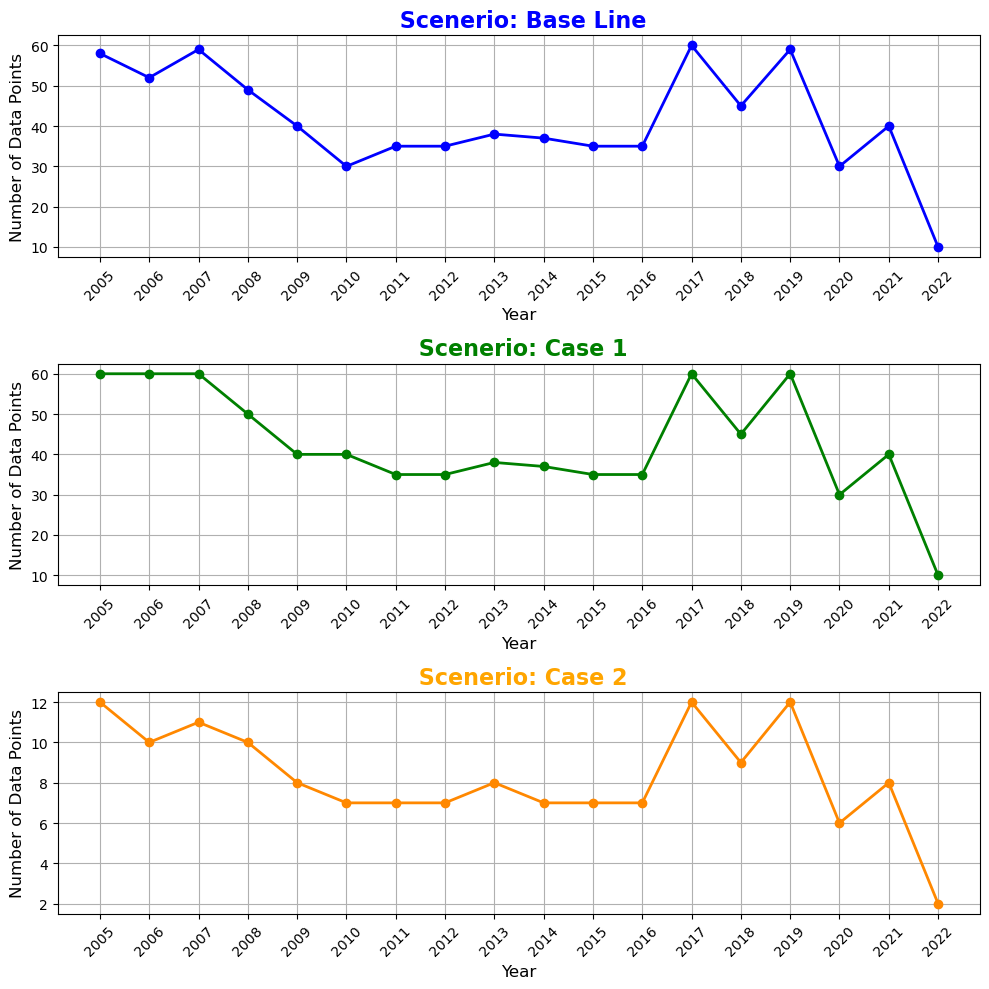

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

# Specify the path to your working directory
working_directory = '/Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02'

# Change the working directory
os.chdir(working_directory)

# Define the file names for your CSV files
file_names = ["station-091020.csv", "station-091023.csv", "station-091026.csv", "station-091028.csv", "station-091030.csv"]

# Create an empty list to store the DataFrames
dataframes = []

# Iterate through the CSV files and load data
for file_name in file_names:
    df = pd.read_csv(file_name)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    dataframes.append(df)

# Create subplots for "Base Line," "Case 1," and "Case 2"
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Scenerio: Base Line
selected_data = pd.concat(dataframes, ignore_index=True)
Q1 = selected_data['tss_value'].quantile(0.25)
Q3 = selected_data['tss_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
selected_data_no_outliers = selected_data[(selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound)]
data_points_per_year = selected_data_no_outliers.groupby(['year']).size().reset_index(name='data_points_count')
axes[0].plot(
    data_points_per_year['year'].astype(str),
    data_points_per_year['data_points_count'],
    marker='o',
    linestyle='-',
    color='b',
    markersize=6,
    linewidth=2,
)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Data Points', fontsize=12)
axes[0].set_title(' Scenerio: Base Line', fontsize=16, fontweight='bold', color='blue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Scenerio: Case 1
selected_data = pd.concat(dataframes, ignore_index=True)
data_points_per_year = selected_data.groupby(['year']).size().reset_index(name='data_points_count')
axes[1].plot(
    data_points_per_year['year'].astype(str),
    data_points_per_year['data_points_count'],
    marker='o',
    linestyle='-',
    color='g',
    markersize=6,
    linewidth=2,
)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Number of Data Points', fontsize=12)
axes[1].set_title(' Scenerio: Case 1', fontsize=16, fontweight='bold', color='green')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Scenerio: Case 2
selected_data = dataframes[3]  # Use DataFrame[3] for Case 2
Q1 = selected_data['tss_value'].quantile(0.25)
Q3 = selected_data['tss_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
selected_data_no_outliers = selected_data[(selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound)]
data_points_per_year = selected_data_no_outliers.groupby(['year']).size().reset_index(name='data_points_count')
axes[2].plot(
    data_points_per_year['year'].astype(str),
    data_points_per_year['data_points_count'],
    marker='o',
    linestyle='-',
    color='#F80',
    markersize=6,
    linewidth=2,
)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('Number of Data Points', fontsize=12)
axes[2].set_title(' Scenerio: Case 2', fontsize=16, fontweight='bold', color='orange')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Save the figure as an image file (e.g., PNG)
fig.savefig('Check Data Availability.png', dpi=300, bbox_inches='tight')



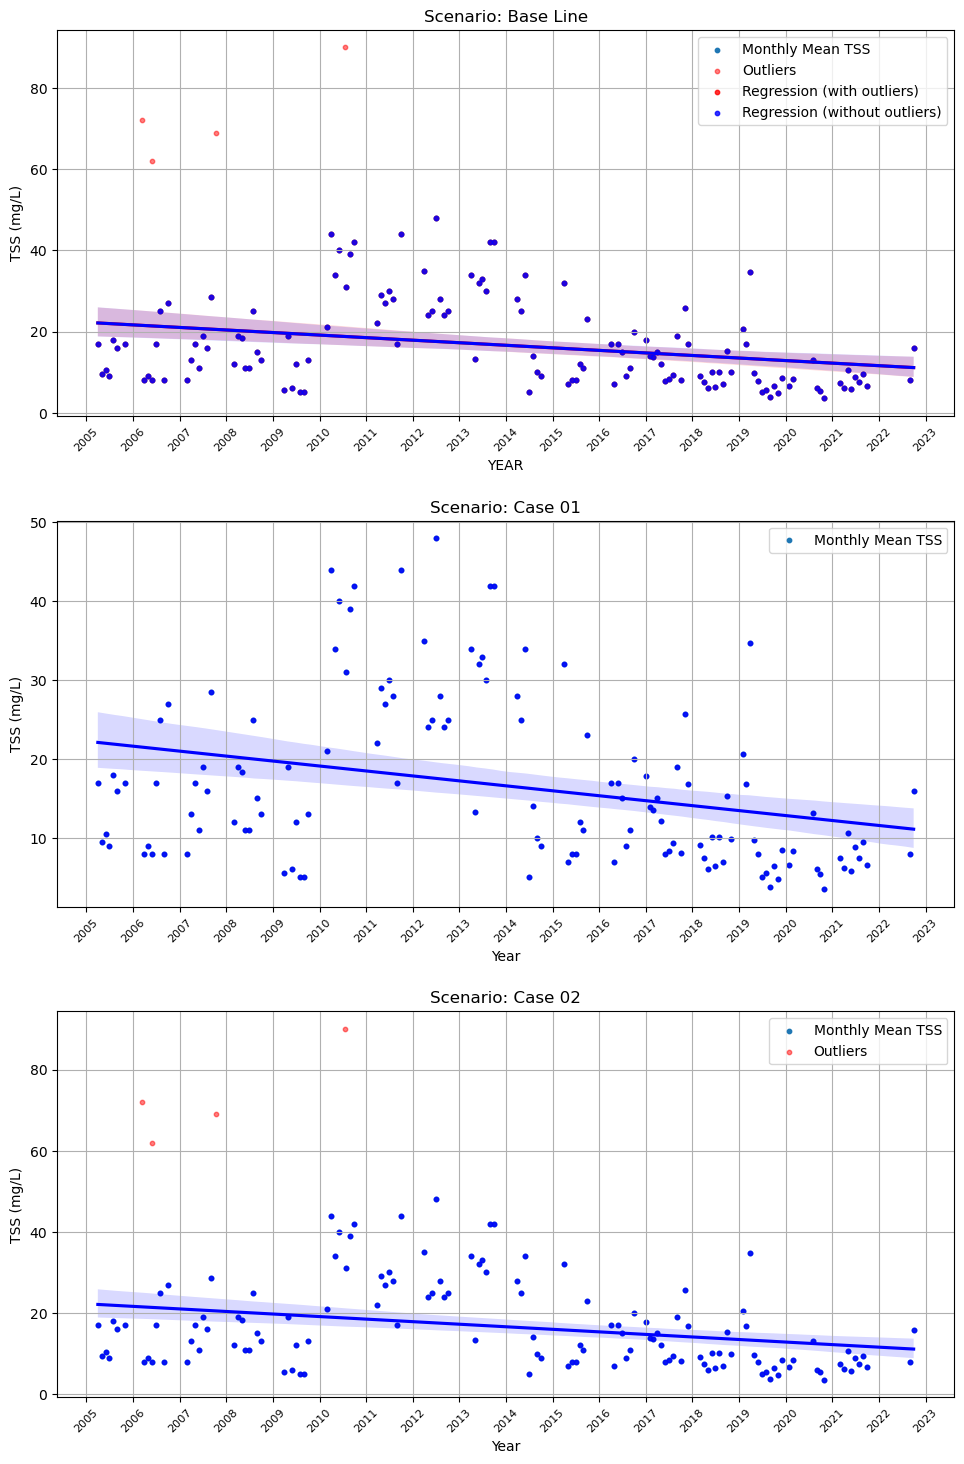

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load your dataframes
# Assuming you have a list of dataframes named dataframes

# 1. Remove outliers using the IQR rule
Q1 = selected_data['tss_value'].quantile(0.25)
Q3 = selected_data['tss_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
selected_data_no_outliers = selected_data[(selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound)]
outliers = selected_data[~((selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound))]

# 2. Spatio-Temporal Binning
# Create a DataFrame with a range of months from 2005 to 2022
date_range = pd.date_range(start='2005-01-01', end='2022-12-01', freq='M')
monthly_means = []

for month in date_range:
    monthly_data = selected_data_no_outliers[(selected_data_no_outliers['timestamp'] >= month) &
                                             (selected_data_no_outliers['timestamp'] < (month + pd.DateOffset(months=1)))]
    if not monthly_data.empty:
        monthly_mean = monthly_data['tss_value'].mean()
        monthly_means.append(monthly_mean)
    else:
        monthly_means.append(np.nan)

spatio_temporal_binning0 = pd.DataFrame({'Date': date_range, 'MonthlyMeanTSS': monthly_means})

# 3. Remove Missing Data and Seasonal Cycle
# Remove months with missing data
spatio_temporal_binning0 = spatio_temporal_binning0.dropna()

# Convert the 'Date' column to a numeric format
spatio_temporal_binning0['NumericDate'] = mdates.date2num(spatio_temporal_binning0['Date'])

# Plot the monthly mean TSS values
plt.figure(figsize=(10, 15))

# Create subplots for the three scenarios with space between plots
plt.subplot(311)
# Scatter plot of the monthly mean TSS values
plt.scatter(spatio_temporal_binning0['Date'], spatio_temporal_binning0['MonthlyMeanTSS'], marker='o', label='Monthly Mean TSS', s=10)

# Scatter plot of outliers (red points)
plt.scatter(outliers['timestamp'], outliers['tss_value'], c='red', marker='o', label='Outliers', alpha=0.5, s=10)

# Regression line including outliers (red)
sns.regplot(x='NumericDate', y='MonthlyMeanTSS', data=spatio_temporal_binning0, color='red', label='Regression (with outliers)', scatter_kws={'s': 10})

# Regression line excluding outliers (blue)
sns.regplot(x='NumericDate', y='MonthlyMeanTSS', data=spatio_temporal_binning0, color='blue', label='Regression (without outliers)', scatter_kws={'s': 10})

plt.xlabel('YEAR')
plt.ylabel('TSS (mg/L)')
plt.title('Scenario: Base Line')
plt.legend()
plt.grid(True)

# Format X-axis ticks to show only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=8)

# Select data only from dataframes[3] (fourth dataframe)
selected_data = dataframes[3]

# 1. Remove outliers using the IQR rule
Q1 = selected_data['tss_value'].quantile(0.25)
Q3 = selected_data['tss_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
selected_data_no_outliers = selected_data[(selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound)]
outliers = selected_data[~((selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound))]

# 2. Spatio-Temporal Binning
# Create a DataFrame with a range of months from 2005 to 2022
date_range = pd.date_range(start='2005-01-01', end='2022-12-01', freq='M')
monthly_means = []

for month in date_range:
    monthly_data = selected_data_no_outliers[(selected_data_no_outliers['timestamp'] >= month) &
                                             (selected_data_no_outliers['timestamp'] < (month + pd.DateOffset(months=1)))]
    if not monthly_data.empty:
        monthly_mean = monthly_data['tss_value'].mean()
        monthly_means.append(monthly_mean)
    else:
        monthly_means.append(np.nan)

spatio_temporal_binning1 = pd.DataFrame({'Date': date_range, 'MonthlyMeanTSS': monthly_means})

# 3. Remove Missing Data and Seasonal Cycle
# Remove months with missing data
spatio_temporal_binning1 = spatio_temporal_binning1.dropna()

# Plot the monthly mean TSS values for Scenario 01 with reduced marker size
plt.subplot(312)
plt.scatter(spatio_temporal_binning1['Date'], spatio_temporal_binning1['MonthlyMeanTSS'], marker='o', label='Monthly Mean TSS', s=10)
plt.xlabel('YEAR')  # Change the x-axis label to 'YEAR'
plt.ylabel('TSS (mg/L)')  # Change the y-axis label to 'TSS (mg/L)'
plt.title('Scenario: Case 01')
plt.legend()
plt.grid(True)

# Format X-axis ticks to show only the years and rotate them at a 45-degree angle
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=8)

# Convert 'Date' to numeric values for regression plotting
spatio_temporal_binning1['NumericDate'] = mdates.date2num(spatio_temporal_binning1['Date'])

# Regression line for Scenario 01
sns.regplot(x='NumericDate', y='MonthlyMeanTSS', data=spatio_temporal_binning1, color='blue', label='Regression', scatter_kws={'s': 10})
plt.xlabel('Year')  # Add X-axis label
plt.ylabel('TSS (mg/L)')  # Add Y-axis label
# Select data only from dataframes[3] (fourth dataframe)
selected_data = dataframes[3]

# 1. Remove outliers using the IQR rule
Q1 = selected_data['tss_value'].quantile(0.25)
Q3 = selected_data['tss_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
selected_data_no_outliers = selected_data[(selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound)]
outliers = selected_data[~((selected_data['tss_value'] >= lower_bound) & (selected_data['tss_value'] <= upper_bound))]

# 2. Spatio-Temporal Binning
# Create a DataFrame with a range of months from 2005 to 2022
date_range = pd.date_range(start='2005-01-01', end='2022-12-01', freq='M')
monthly_means = []

for month in date_range:
    monthly_data = selected_data_no_outliers[(selected_data_no_outliers['timestamp'] >= month) &
                                             (selected_data_no_outliers['timestamp'] < (month + pd.DateOffset(months=1)))]
    if not monthly_data.empty:
        monthly_mean = monthly_data['tss_value'].mean()
        monthly_means.append(monthly_mean)
    else:
        monthly_means.append(np.nan)

spatio_temporal_binning2 = pd.DataFrame({'Date': date_range, 'MonthlyMeanTSS': monthly_means})

# 3. Remove Missing Data and Seasonal Cycle
# Remove months with missing data
spatio_temporal_binning2 = spatio_temporal_binning2.dropna()

# Plot the monthly mean TSS values for Scenario 2 (using data from dataframes[3]) with reduced marker size
plt.subplot(313)
plt.scatter(spatio_temporal_binning2['Date'], spatio_temporal_binning2['MonthlyMeanTSS'], marker='o', label='Monthly Mean TSS', s=10)
plt.scatter(outliers['timestamp'], outliers['tss_value'], c='red', marker='o', label='Outliers', alpha=0.5, s=10)
plt.xlabel('YEAR')  # Change the x-axis label to 'YEAR'
plt.ylabel('TSS (mg/L)')  # Change the y-axis label to 'TSS (mg/L)'
plt.title('Scenario: Case 02')
plt.legend()
plt.grid(True)

# Format X-axis ticks to show only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=8)

# Convert 'Date' to numeric values for regression plotting
spatio_temporal_binning2['NumericDate'] = mdates.date2num(spatio_temporal_binning2['Date'])

# Regression line excluding outliers (blue)
sns.regplot(x='NumericDate', y='MonthlyMeanTSS', data=spatio_temporal_binning2, color='blue', label='Regression', scatter_kws={'s': 10})
plt.xlabel('Year')  # Add X-axis label
plt.ylabel('TSS (mg/L)')  # Add Y-axis label
# Show the combined plot with space between subplots
plt.tight_layout(pad=2.0)

# Save the plot as PNG
plt.savefig('combined_plots.png')

# Show the combined plot
plt.show()


In [15]:
from tabulate import tabulate
import pandas as pd
import statsmodels.api as sm

# List of scenario names
scenario_names = ['Scenerio: Base Line', 'Scenerio: Case 01', 'Scenerio: Case 02']

# List of corresponding subsets of the data for each scenario (replace with your actual data subsets)
data_subsets = [spatio_temporal_binning0, spatio_temporal_binning1, spatio_temporal_binning2]

# Create an empty list to store DataFrames for each scenario
results_tables = []

# Iterate through scenarios and compute results
for i, scenario_name in enumerate(scenario_names):
    subset = data_subsets[i]
    model_without_outliers = sm.OLS(subset['MonthlyMeanTSS'], sm.add_constant(subset['NumericDate']), missing='drop').fit()
    results_table = pd.DataFrame({
        'Scenario': [scenario_name],
        'Slope (TSS unit/year)': [model_without_outliers.params['NumericDate']],
        'Intercept': [model_without_outliers.params['const']],
        'Number of data points (n)': [model_without_outliers.nobs],
        'P-value': [model_without_outliers.pvalues['NumericDate']]
    })
    results_tables.append(results_table)

# Concatenate the individual DataFrames into one DataFrame
combined_results_table = pd.concat(results_tables, ignore_index=True)

# Convert the results table to a grid format and display it
grid_table = tabulate(combined_results_table, headers='keys', tablefmt='grid')
print(grid_table)


+----+---------------------+-------------------------+-------------+-----------------------------+-------------+
|    | Scenario            |   Slope (TSS unit/year) |   Intercept |   Number of data points (n) |     P-value |
+====+=====================+=========================+=============+=============================+=============+
|  0 | Scenerio: Base Line |             -0.00172001 |     44.2482 |                         133 | 0.000533899 |
+----+---------------------+-------------------------+-------------+-----------------------------+-------------+
|  1 | Scenerio: Case 01   |             -0.00172001 |     44.2482 |                         133 | 0.000533899 |
+----+---------------------+-------------------------+-------------+-----------------------------+-------------+
|  2 | Scenerio: Case 02   |             -0.00172001 |     44.2482 |                         133 | 0.000533899 |
+----+---------------------+-------------------------+-------------+----------------------------